#  Timeframes Exploration

In [1]:
from __future__ import print_function, division
import time

from matplotlib import rcParams
import matplotlib.pyplot as plt

from nilmtk import DataSet, TimeFrame, MeterGroup, HDFDataStore

## Appliance training on multiple houses 

In [96]:
dataset = DataSet('ukdale.h5')

appliance = 'dish washer'
sample_period = 6
houses = [1,2,3]

start_list = []
end_list = []
#find timeframes where meters are active
for i in houses:
    try:
    
        train_meter = dataset.buildings[i].elec[appliance]
        train_mains = dataset.buildings[i].elec.mains()

        start_app = train_meter.get_timeframe().start.date()
        end_app =  train_meter.get_timeframe().end.date()

        start_list.append(start_app)
        end_list.append(end_app)

        print(start_app < end_app)
        print('HOUSE {}'.format(i))
        print('{} meter: start {}   end {}'.format( appliance, start_app, end_app)) 
        start_mains = train_mains.get_timeframe().start.date()
        end_mains =  train_mains.get_timeframe().end.date()   
        print('Mains meter: start {}   end {}'.format( start_mains, end_mains))
        print()
        
    except:
        print('HOUSE {}'.format(i))
        print("There is no {} in house {}".format(appliance,i))
        print()
    
x = max(start_list)
print('The common time interval for kettle meter is: START {}    END {}'.format(max(start_list),min(end_list)))
    
    

True
HOUSE 1
dish washer meter: start 2012-11-09   end 2017-04-26
Mains meter: start 2013-03-17   end 2017-04-26

True
HOUSE 2
dish washer meter: start 2013-05-20   end 2013-10-10
Mains meter: start 2013-04-16   end 2013-10-10

HOUSE 3
There is no dish washer in house 3

The common time interval for kettle meter is: START 2013-05-20    END 2013-10-10


## Appliance testing on one house

In [3]:
appliance = 'microwave'
house = 5

test_meter = dataset.buildings[house].elec[appliance]
test_mains = dataset.buildings[house].elec.mains()

start_app = test_meter.get_timeframe().start.date()
end_app =  test_meter.get_timeframe().end.date()

start_mains = test_mains.get_timeframe().start.date()
end_mains =  test_mains.get_timeframe().end.date()
print('HOUSE {}'.format(house))
print('{} meter: start {}   end {}'.format( appliance, start_app, end_app))
print('Mains meter: start {}   end {}'.format(start_mains, end_mains))

HOUSE 5
microwave meter: start 2014-06-29   end 2014-11-13
Mains meter: start 2014-06-29   end 2014-11-13


## Extract activations

In [ ]:
dataset.set_window("2011-04-18", "2011-05-24")

BUILDING = 1
elec = dataset.buildings[BUILDING].elec
fridge = elec['microwave']

In [ ]:
activations = fridge.get_activations()
print("Number of activations =", len(activations))

activations[1].plot()
plt.show()

In [ ]:
activations[2].plot()
plt.show()

In [ ]:
dataset = DataSet('ukdale.h5')
dataset.set_window("2013-03-17", "2014-03-17")
test_mains = dataset.buildings[1].elec.mains().power_series_all_data()
max(test_mains)

## Graphs

In [111]:
dataset = DataSet('ukdale.h5')

appliance = 'dish washer'
sample_period = 6
houses = [2]

#window_per_house = {1: ('2013-03-22', "2013-03-23")}
#window_per_house = {1: ('2013-04-02', '2013-05-23')}
window_per_house = {2: ('2013-07-10 ' , '2013-7-16')}

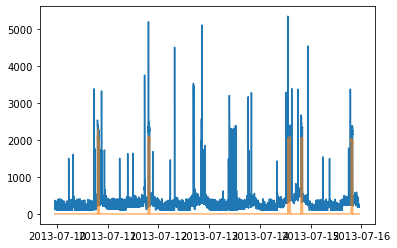

In [112]:
def sampling(x,y,**load_kwargs):
    x = x.power_series_all_data(**load_kwargs)
    y = y.power_series_all_data(**load_kwargs)
    
    return x , y

for i in houses:
    try:
        
        dataset.set_window(*window_per_house[i])
    
        train_meter = dataset.buildings[i].elec[appliance]
        train_mains = dataset.buildings[i].elec.mains()
        
        x, y = sampling(train_mains, train_meter, sample_period  = sample_period)
        plt.plot(x)
        plt.plot(y,alpha=0.6)


        
    except:
        print('HOUSE {}'.format(i))
        print("There is no {} in house {}".format(appliance,i))
        print()

## Timeframes

### UKDALE
=================================================================
##### **Kettle**

In [ ]:
# House 1
train_house = {1: ('2014-01-30', '2014-04-10')} 
test_house = {1: ('2014-04-10', '2014-04-13')}

# House 2 (Don't train kettle on house 2)
train_house = {2: ('2013-06-20', '2013-8-4')}
test_house = {2: ('2013-08-04', '2013-8-06')}

##### **Fridge**

In [ ]:
# House 1
train_house = {1: ('2013-04-03', '2013-05-17')}
test_house = {1: ('2013-10-17', '2013-10-21')}

##### **Washing machine**

In [60]:
# House 1
train_house = {1: ('2016-04-12' , '2016-05-12')}
test_house = {1: ('2016-06-04' , '2016-06-12')}

# House 2
train_house = {2: ('2013-05-20' , '2013-08-20')}
test_house = {2: ('2013-10-05' , '2013-10-10')}

##### **Microwave**

In [ ]:
# House 1
train_house = {1: ('2016-04-10' , '2016-05-10')}
test_house = {1: ('2016-06-20' , '2016-06-30')}


# House 2 (Better Data in this house)
train_house = {2: ('2013-05-20' , '2013-07-30')}
test_house = {2: ('2013-08-01' , '2013-08-06')}

##### **Dish washer**

In [ ]:
# House 1
train_house = {1: ('2015-01-17' , '2015-04-17')}
test_house = {1: ('2015-04-17' , '2015-04-27')}


# House 2 (Better Data in this house)
train_house = {2: ('2013-05-20 ' , '2013-7-10')}
test_house = {2: ('2013-07-10 ' , '2013-7-16')}